In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [2]:
import awswrangler as wr
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore")

sns.set_theme()

import itertools
import matplotlib.gridspec as gridspec

from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

import warnings

warnings.filterwarnings("ignore")
import json
from tsai.all import *
from IPython.display import display, Markdown
import json
# from pandas.io.json import json_normalize

from matplotlib.patches import Patch

import matplotlib.dates as mdates

from helper_functions.data_readers import *

from helper_functions.aggregations import *

## helper functions

In [3]:
colors = sns.color_palette(
    [
        "#184EAD",
        "#648fff",
        "#88ccee",
        "#ae9ef7",
        "#6844d5",
        "#332288",
        "#c52dac",
        "#ef4341",
        "#84164c",
        "#cb6577",
        "#ff6100",
        "#90550f",
        "#c78d1b",
        "#ffb003",
        "#ddcc77",
        "#a2c662",
        "#40a018",
        "#117347",
        "#43aa99",
    ]
)

In [4]:
color_list = [
    "#184EAD",
    "#648fff",
    "#88ccee",
    "#ae9ef7",
    "#6844d5",
    "#332288",
    "#c52dac",
    "#ef4341",
    "#84164c",
    "#cb6577",
    "#ff6100",
    "#90550f",
    "#c78d1b",
    "#ffb003",
    "#ddcc77",
    "#a2c662",
    "#40a018",
    "#117347",
    "#43aa99",
]

In [5]:
%matplotlib inline


def show_color_pallete():
    # fig, ax = plt.subplots()
    color_list = [
        "#184EAD",
        "#648fff",
        "#88ccee",
        "#ae9ef7",
        "#6844d5",
        "#332288",
        "#c52dac",
        "#ef4341",
        "#84164c",
        "#cb6577",
        "#ff6100",
        "#90550f",
        "#c78d1b",
        "#ffb003",
        "#ddcc77",
        "#a2c662",
        "#40a018",
        "#117347",
        "#43aa99",
    ]
    sns.palplot(color_list, size=2)
    ax = plt.gca()
    for i, name in enumerate(color_list):
        label = f"[{i}] {name}"
        ax.text(i, -0.57, label, horizontalalignment="center", fontsize=10)
    plt.show()

### plotting & annotations

In [11]:
# def annotate(ax, data, x_col, y_col):
#     x = np.array(data[x_col]).reshape((-1, 1))
#     y = np.array(data[y_col]).reshape((-1, 1))
#     model = LinearRegression()
#     model.fit(x,y)
#     r2 = model.score(x,y)
#     coefficients = model.coef_
#     intercept = model.intercept_


#     beta0 = r'$intercept = \hat\beta_0 =$' + str(round(intercept[0],2))

#     beta1 = r'$slope = \hat\beta_1 =$' + str(round(coefficients[0][0],2))

#     r_squared = r'$R^2 =$' + str(round(r2,2))

#     textstr = '\n'.join((
#         beta0, beta1, r_squared
#     ))
#     props = dict(boxstyle='round', facecolor='white', alpha=0.35)
#     ax.text(.7 , .75, textstr, transform=ax.transAxes, fontsize=9, weight = 'bold', horizontalalignment='center', bbox=props)

## Reading in Data

In [7]:
# ST Patrick Trips
StPatrick1data = get_data(boat="stpatrick", trip_no=0)
StPatrick2data = get_data(boat="stpatrick", trip_no=1)

counts_StPatrick1 = StPatrick1data["all_counts"]
counts_StPatrick2 = StPatrick2data["all_counts"]

stpatrick1_elog = StPatrick1data["elogs"]
stpatrick2_elog = StPatrick2data["elogs"]

stpatrick1_bv_set_counts = StPatrick1data["bv_set_counts"]
stpatrick1_bv_set_counts = StPatrick2data["bv_set_counts"]

{'trip_id': 'stpatrick_2024-01-03', 'trip_start_date': '2024-01-03', 'trip_end_date': '2024-01-28'}
{'trip_id': 'stpatrick_2024-02-03', 'trip_start_date': '2024-02-03', 'trip_end_date': '2024-02-28'}


In [8]:
stpatrick1_bv_sets = StPatrick1data["bv_sets"]
stpatrick2_bv_sets = StPatrick2data["bv_sets"]

In [9]:
counts_StPatrick1.head()

,id,overallcount,overallcatches,overalldiscards,count,detection_confidence,start_datetime,utc_start_datetime,utc_end_datetime,weighted_count,bv_count
2226,6249,3.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:10:00+00:00,2024-01-03 13:10:00,2024-01-03 13:15:00,<NA>,0.0
353,6250,10.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:15:00+00:00,2024-01-03 13:15:00,2024-01-03 13:20:00,<NA>,0.0
2227,6251,17.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:20:00+00:00,2024-01-03 13:20:00,2024-01-03 13:25:00,<NA>,0.0
2228,6252,6.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:25:00+00:00,2024-01-03 13:25:00,2024-01-03 13:30:00,<NA>,0.0
354,6253,9.0,<NA>,<NA>,NaN,<NA>,2024-01-03 13:35:00+00:00,2024-01-03 13:35:00,2024-01-03 13:40:00,<NA>,0.0


In [10]:
# Brancol Trips
Brancol1data = get_data(boat="brancol", trip_no=0)
Brancol2data = get_data(boat="brancol", trip_no=1)


counts_Brancol1 = Brancol1data["all_counts"]
counts_Brancol2 = Brancol2data["all_counts"]

brancol1_elog = Brancol1data["elogs"]
brancol2_elog = Brancol2data["elogs"]

brancol1_bv_sets = Brancol1data["bv_sets"]
brancol2_bv_sets = Brancol2data["bv_sets"]

brancol1_bv_set_counts = Brancol1data["bv_set_counts"]
brancol2_bv_set_counts = Brancol2data["bv_set_counts"]

brancol2trip = Brancol2data["trip_info"]
brancol1trip = Brancol1data["trip_info"]

{'trip_id': 'brancol_2024-01-05', 'trip_start_date': '2024-01-05', 'trip_end_date': '2024-01-26'}
{'trip_id': 'brancol_2024-02-03', 'trip_start_date': '2024-02-03', 'trip_end_date': '2024-02-26'}


##### 

## Sets & Counts Plot

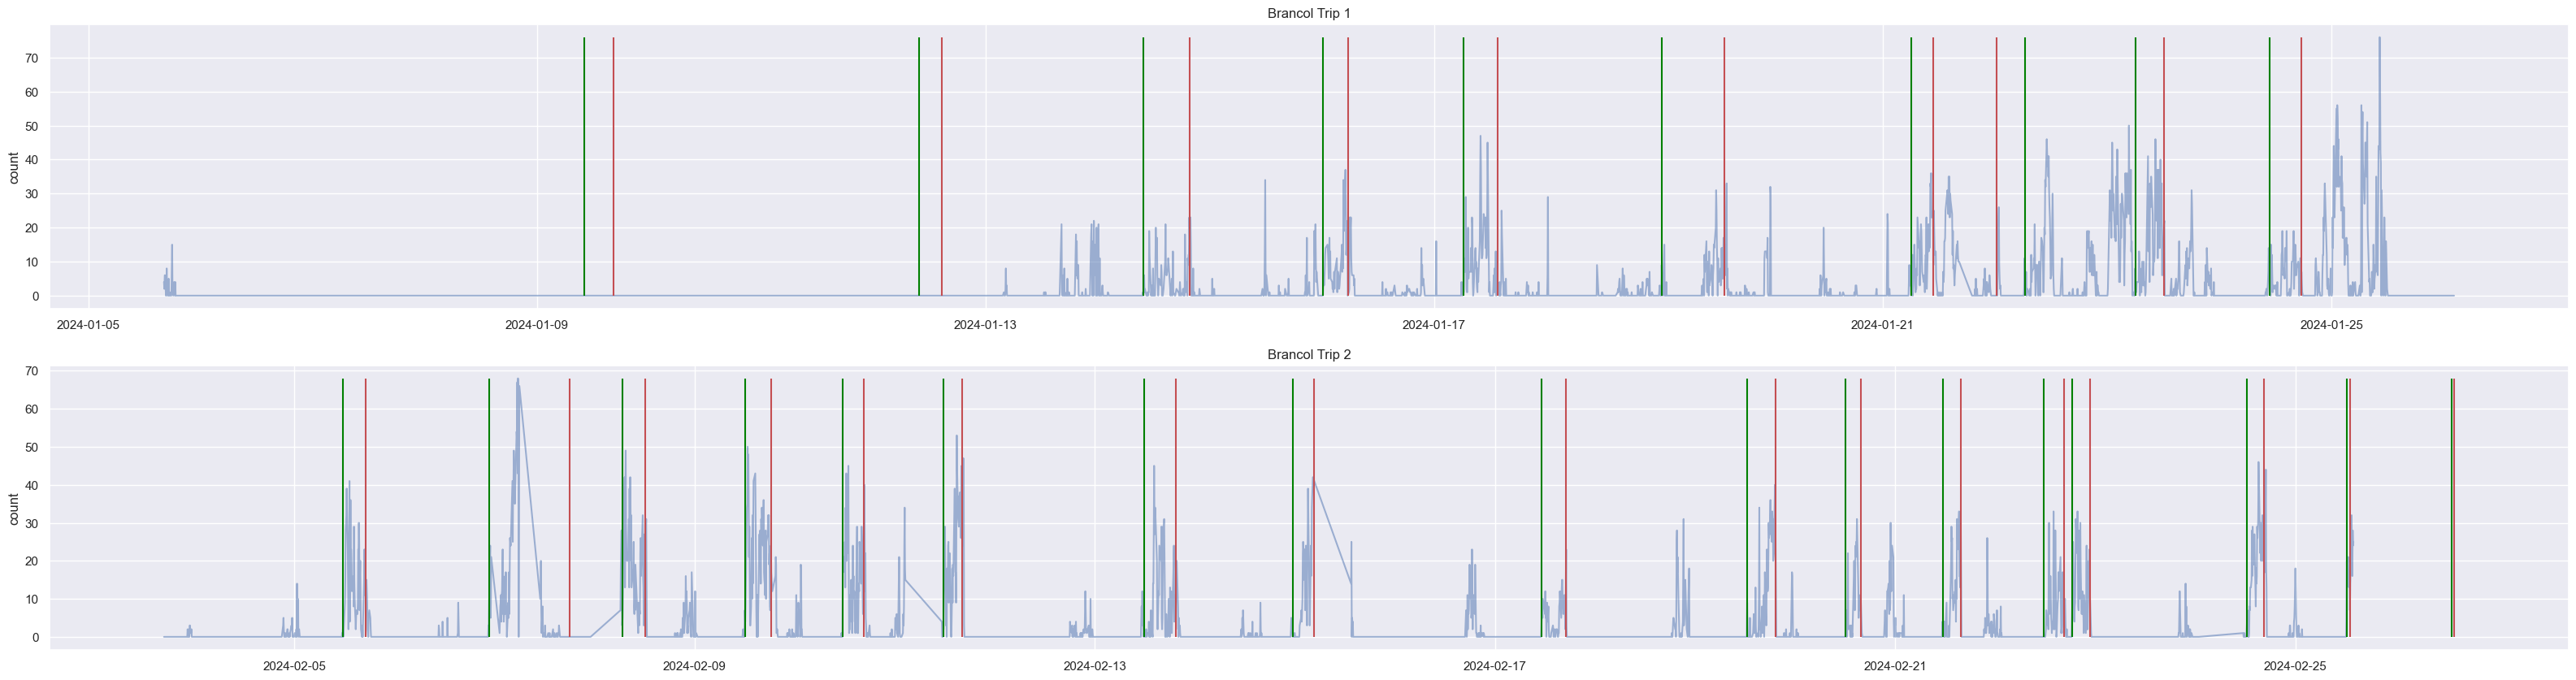

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(40, 10))

dfBrancol1 = Brancol1data["ai_sets"]
data = dfBrancol1
sets = Brancol1data["bv_sets"]
haul_starts = sets.haul_start_datetime.unique().dropna()
haul_ends = sets.haul_end_datetime.unique().dropna()
ymax = data["count"].max()

ax[0].title.set_text("Brancol Trip 1")
sns.lineplot(x="utc_start_datetime", y="count", data=data, ax=ax[0], alpha=0.5)
# draw verticle lines (I can do this in one line)
ax[0].vlines(haul_starts, 0, ymax, colors="green")
ax[0].vlines(haul_ends, 0, ymax, colors="r")
ax[0].set_xlabel("")

dfBrancol2 = Brancol2data["ai_sets"]
data = dfBrancol2
sets = Brancol2data["bv_sets"]
haul_starts = sets.haul_start_datetime.unique().dropna()
haul_ends = sets.haul_end_datetime.unique().dropna()
ymax = data["count"].max()

ax[1].title.set_text("Brancol Trip 2")
sns.lineplot(x="utc_start_datetime", y="count", data=data, ax=ax[1], alpha=0.5)
# draw verticle lines (I can do this in one line)
ax[1].vlines(haul_starts, 0, ymax, colors="green")
ax[1].vlines(haul_ends, 0, ymax, colors="r")
ax[1].set_xlabel("")

plt.show()

## Elog Comparisons

##### helper functions

In [9]:
def plot_hlines(ax, df, y_val, start_col, end_col, width, color, label):
    ax.hlines(
        y=np.full(len(df), y_val),
        xmin=df[start_col].values.reshape((-1, 1)),
        xmax=df[end_col].values.reshape((-1, 1)),
        linewidth=width,
        colors=color,
        label=label,
    )


def plot_set_hlines(ax, df, source, color_dict):
    if source == "elog":
        set_start_col = "systemstartsetdatetime"
        set_end_col = "systemendsetdatetime"
        haul_start_col = "systemstarthauldatetime"
        haul_end_col = "systemendhauldatetime"
        y_val = 1

    elif source == "bv":
        set_start_col = "set_start_datetime"
        set_end_col = "set_end_datetime"
        haul_start_col = "haul_start_datetime"
        haul_end_col = "haul_end_datetime"
        y_val = 0

    colors = color_dict[source]

    # plot_hauling
    plot_hlines(ax, df, y_val, haul_start_col, haul_end_col, 12, colors["haul"], "haul")

    # plot tweener time
    plot_hlines(ax, df, y_val, set_end_col, haul_start_col, 12, colors["between"], "mid")

    # plot setting
    plot_hlines(ax, df, y_val, set_start_col, set_end_col, 12, colors["set"], "set")


def annotate_counts(ax, df, count_col, x_col, y_value):
    props = dict(boxstyle="round", facecolor="white", alpha=0.35)
    for idx, row in df.iterrows():
        text = f"count: {row[count_col]}"
        x_value = row[x_col]
        ax.text(x_value, y_value, text, fontsize=10, horizontalalignment="right", bbox=props)

    # ax.text(.02, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}, rmse={rmse:.2f}', transform=ax.transAxes)

In [10]:
def plot_set_bars(ax, df, source, color_dict):
    if source == "elog":
        set_start_col = "systemstartsetdatetime"
        set_end_col = "systemendsetdatetime"
        haul_start_col = "systemstarthauldatetime"
        haul_end_col = "systemendhauldatetime"
        y_val = 1.7

    elif source == "bv":
        set_start_col = "set_start_datetime"
        set_end_col = "set_end_datetime"
        haul_start_col = "haul_start_datetime"
        haul_end_col = "haul_end_datetime"
        y_val = 0.7

    df["set_duration"] = df[set_end_col] - df[set_start_col]
    df["haul_duration"] = df[haul_end_col] - df[haul_start_col]
    df["mid_duration"] = df[haul_start_col] - df[set_end_col]

    set_x = list(zip(df[set_start_col], df["set_duration"]))
    haul_x = list(zip(df[haul_start_col], df["haul_duration"]))
    mid_x = list(zip(df[set_end_col], df["mid_duration"]))

    y = (y_val, 0.6)

    colors = color_dict[source]
    ax.broken_barh(mid_x, y, facecolors=colors["mid"], edgecolor="face")
    ax.broken_barh(haul_x, y, facecolors=colors["haul"], edgecolor="face")
    ax.broken_barh(set_x, y, facecolors=colors["set"], edgecolor="face")


In [11]:
def plot_elog_comparisons(
    ax, dfElog, dfBV, title, legend=True, annotate_counts=False, display_axis=True
):
    # ax[0].autofmt_xdate()

    ax.set_yticks([1, 2], ("bv", "elogs"))
    # ax.set_yticks([0,1,2],('bv','elogs',' '))
    fig.suptitle(titles["main"], fontsize=20)

    # df1 = brancol1_elog
    # df1sets =brancol1_bv_sets

    if annotate_counts:
        dfElog["totalcount"] = dfElog["bycatchcount"].astype(int) + dfElog["catchcount"].astype(int)
        dfBV["retained_count"] = dfBV["retained_count"].astype("Int64")
        annotate_counts(ax, dfElog, "totalcount", "systemstarthauldatetime", 1.2)
        annotate_counts(ax, dfBV, "retained_count", "haul_start_datetime", 0.2)

    plot_set_bars(ax, dfElog, "elog", color_dict)
    plot_set_bars(ax, dfBV, "bv", color_dict)

    ax.set_title(title, x=0.1, y=1, fontsize=9)

    # ax.autoscale()
    # ax[0].set_ylim(-.5,1.5)
    # ax[0].tick_params(axis='x', labelrotation=45)

    if legend:
        legend_elements = []
        for label, color in color_dict["elog"].items():
            legend_elements.append(Patch(facecolor=color, edgecolor=color, label=label))
        ax.legend(
            handles=legend_elements, loc="center", bbox_to_anchor=(0.5, -1), ncol=3, fontsize=8
        )

    # use consise date formater

    if display_axis:
        locator = DayLocator()
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)

    # ax.set_ylim(-.6,1.6)

#### plot

In [12]:
color_dict = {
    "bv": {"set": "#40a018", "haul": "#117347", "mid": "#a2c662"},
    "elog": {"set": "#40a018", "haul": "#117347", "mid": "#a2c662"},
    # 'elog':{'set':'#648fff', 'haul':'#184EAD', 'mid':'#88ccee'}
}

## Time series classification

#### helper functions

In [13]:
# metrics.ConfusionMatrixDisplay(cm).plot(cmap = 'Blues',ax = ax)
def plot_confusion_matrix(cm, ax, interp, title):
    ax.imshow(cm, interpolation="nearest", cmap="Blues")
    tick_marks = np.arange(len(interp.vocab))
    ax.set_xticks(tick_marks, interp.vocab, rotation=0)
    ax.set_yticks(tick_marks, interp.vocab, rotation=0)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_ylim(len(interp.vocab) - 0.5, -0.5)
    ax.grid(False)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        coeff = f"{cm[i, j]}"
        plt.text(
            j,
            i,
            coeff,
            horizontalalignment="center",
            verticalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

In [14]:
def prep_data(df):
    df.sort_values(by="utc_start_datetime", inplace=True)
    X = df.drop(columns="is_haul")
    y = df["is_haul"].astype("int").to_numpy()

    X.loc[:, "utc_start_datetime"] = X.loc[:, "utc_start_datetime"].astype("int64")
    X = np.atleast_3d(X).transpose(0, 2, 1)

    haul_map = {1: "haul", 0: "no_haul"}
    labeler = ReLabeler(haul_map)
    y = labeler(y)
    return X, y

#### data prep

In [15]:
# training data
dfAiSets_Brancol1 = Brancol1data["ai_sets"].copy()
dfAiSets_Brancol1.set_index("utc_start_datetime", inplace=True)

In [16]:
# testing data
dfAiSets_Brancol2 = Brancol2data["ai_sets"].copy()
dfAiSets_Brancol2.set_index("utc_start_datetime", inplace=True)

In [17]:
win = "2h"
agg_dict = {"weighted_count": "sum", "count": "sum"}
keep_cols = ["weighted_count", "detection_confidence", "count", "is_haul", "id"]

df_train = add_rolling_aggregates(dfAiSets_Brancol1, "2h", agg_dict, keep_cols)
df_test = add_rolling_aggregates(dfAiSets_Brancol2, "2h", agg_dict, keep_cols)

In [18]:
# df_train['id'].fillna(0, inplace = True)
df_train["id"] = df_train["id"].astype(int)
# df_test['id'].fillna(0, inplace = True)
df_test["id"] = df_test["id"].astype(int)

In [19]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [20]:
df_train.dtypes

utc_start_datetime        datetime64[ns]
weighted_count                   float64
detection_confidence             float64
count                            float64
is_haul                            int64
id                                 int64
rolling_weighted_count           float64
rolling_count                    float64
dtype: object

In [21]:
X, y = prep_data(df_train)
X_test, y_test = prep_data(df_test)

#### model training

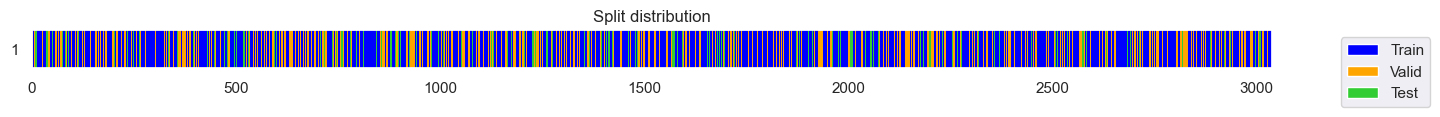

((#2984) [2268,513,358,30,1095,2123,2477,1124,1670,2956...],
 (#911) [696,207,1150,1348,1937,656,1371,2381,1174,546...],
 (#303) [1407,2673,2587,532,38,1815,1776,2971,746,1679...])

In [22]:
## train, test, validation splits
splits = get_splits(
    y,
    n_splits=1,
    valid_size=0.3,
    test_size=0.1,
    shuffle=True,
    balance=True,
    stratify=True,
    random_state=42,
    show_plot=True,
    verbose=True,
)
splits

In [23]:
## dataset and loaders

tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)

bs = 10
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[bs, bs * 2])

In [35]:
# all the different models to test
archs = [
    (RNNPlus, {"n_layers": 3, "bidirectional": True}),
    (LSTMPlus, {"n_layers": 3, "bidirectional": True}),
    (LSTMPlus, {"n_layers": 4, "bidirectional": True}),
    (GRUPlus, {"n_layers": 3, "bidirectional": True}),
    (RNNPlus, {"n_layers": 4, "bidirectional": True}),
    (RNNPlus, {"n_layers": 4, "bidirectional": True}),
    (LSTM, {"n_layers": 3, "bidirectional": False}),
    (RNN, {"n_layers": 3, "bidirectional": True}),
    (LSTM, {"n_layers": 3, "bidirectional": True}),
    (LSTM, {"n_layers": 4, "bidirectional": True}),
    (GRU, {"n_layers": 3, "bidirectional": True}),
]

In [36]:
# from IPython.display import clear_output


# def train_models(archs):
#     results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])
#     models = {}
#     for i, (arch, k) in enumerate(archs):

#         model = create_model(arch, dls=dls, **k)

#         print(model.__class__.__name__)

#         learn = Learner(dls, model,  metrics=accuracy)
#         start = time.time()
#         learn.fit_one_cycle(20, 1e-3)
#         elapsed = time.time() - start
#         vals = learn.recorder.values[-1]
#         results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], int(elapsed)]
#         results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)

#         models[f'{arch.__name__} {k}'] = learn

#         clear_output()
#         display(results)
#     return models

In [33]:
if "RNNPlus {'n_layers': 3, 'bidirectional': True}" in models.keys():
    print("yup!")

yup!


In [37]:
from IPython.display import clear_output


results = pd.DataFrame(
    columns=["arch", "hyperparams", "total params", "train loss", "valid loss", "accuracy", "time"]
)
models = {}
for i, (arch, k) in enumerate(archs):
    model = create_model(arch, dls=dls, **k)

    print(model.__class__.__name__)

    learn = Learner(dls, model, metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(20, 1e-3)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [
        arch.__name__,
        k,
        count_parameters(model),
        vals[0],
        vals[1],
        vals[2],
        int(elapsed),
    ]
    results.sort_values(by="accuracy", ascending=False, ignore_index=True, inplace=True)

    models[f"{arch.__name__} {k}"] = learn

    clear_output()
    display(results)

,arch,hyperparams,total params,train loss,valid loss,accuracy,time
0,LSTM,"{'n_layers': 4, 'bidirectional': True}",807602,0.233733,0.270401,0.902305,499
1,RNNPlus,"{'n_layers': 4, 'bidirectional': True}",202202,0.245694,0.277917,0.901207,748
2,LSTMPlus,"{'n_layers': 4, 'bidirectional': True}",807602,0.244427,0.270318,0.900110,406
3,RNNPlus,"{'n_layers': 3, 'bidirectional': True}",141802,0.223813,0.283997,0.895719,619
4,RNNPlus,"{'n_layers': 4, 'bidirectional': True}",202202,0.254411,0.280316,0.895719,746
5,LSTM,"{'n_layers': 3, 'bidirectional': False}",203002,0.227622,0.261224,0.895719,172
6,RNN,"{'n_layers': 3, 'bidirectional': True}",141802,0.236447,0.283991,0.895719,562
7,LSTM,"{'n_layers': 3, 'bidirectional': True}",566002,0.213956,0.273825,0.894621,315
8,LSTMPlus,"{'n_layers': 3, 'bidirectional': True}",566002,0.229685,0.278858,0.892426,312
9,GRU,"{'n_layers': 3, 'bidirectional': True}",424602,0.212914,0.278833,0.890231,1050


In [160]:
from sklearn import metrics

#### confusion matrix

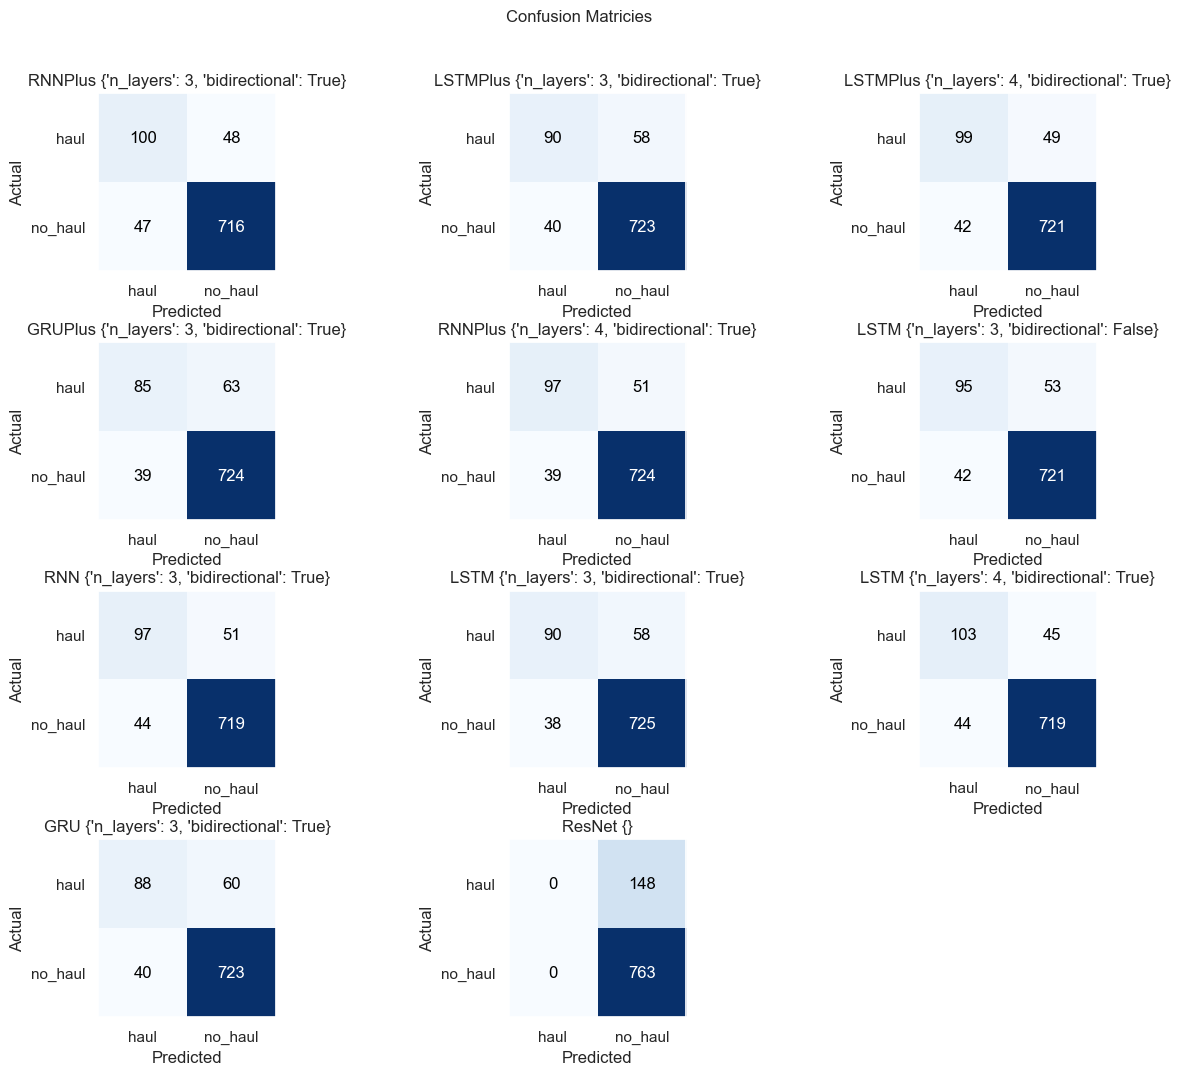

In [40]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Confusion Matricies", fontsize=12, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 3
# calculate number of rows
nrows = len(archs) // ncols + (len(archs) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, (arch, model) in enumerate(models.items()):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)
    ax.set_title(arch)
    # plt.sca(ax)
    interp = ClassificationInterpretation.from_learner(model)
    plot_confusion_matrix(interp.confusion_matrix(), ax, interp, arch)
    # print(type(fig))
    # chart formatting
    # ax.set_title(ticker.upper())
    # ax.get_legend().remove()
    # ax.set_xlabel("")


#### choosing best model and saving it

In [41]:
# choosing the RNN Plus model and saving it
arch, k = (RNNPlus, {"n_layers": 4, "bidirectional": True})
model = create_model(arch, dls=dls, **k)

learner = load_model("models/rnn_plus_haul_classifier.pth", model, opt=None, with_opt=False)

learner = Learner(dls, model, metrics=accuracy)

#### helper functions

In [168]:
def plot_event_bars(
    df,
    ax,
    label,
    datetime_col,
    duration=None,
    end_col=None,
    duration_col=None,
    y_val=0.7,
    y_height=0.6,
    color="#43aa99",
):
    if duration:
        x_duration = np.full(len(df), pd.Timedelta(duration))
    elif end_col:
        df["duration"] = df[end_col] - df[datetime_col]
        x_duration = df["duration"]
    elif duration_col:
        x_duration = df[duration_col]

    x = list(zip(df[datetime_col], x_duration))
    y = (y_val, y_height)

    ax.broken_barh(x, y, facecolors=color, edgecolor="face", label=label, clip_on=False)


In [225]:
def plot_event_vspan(df_events, ax, color_dict):
    for category, color in color_dict.items():
        df_category = df_events.loc[df_events["category"] == category]

        for idx, row in df_category.iterrows():
            ax.axvspan(
                *mdates.date2num([row["start_time"], row["end_time"]]),
                color=color,
                edgecolor="face",
                alpha=0.5,
            )

In [47]:
def plot_set_vspan(df_sets, ax, color="#a2c662"):
    for idx, row in df_sets.iterrows():
        ax.axvspan(
            *mdates.date2num([row["haul_start_datetime"], row["haul_end_datetime"]]),
            color=color,
            edgecolor="#40a018",
            alpha=0.5,
        )


def get_video_times(vessel, trip_info):
    trip_start_date = trip_info["trip_start_date"]
    trip_end_date = trip_info["trip_end_date"]

    sql = f"""
         SELECT
            v.start_datetime,
            v.cam_name

            from {vessel}_v1_video_files v
            where start_datetime > '{trip_start_date}' and start_datetime < '{trip_end_date}'
    """
    video_df = wr.athena.read_sql_query(sql, database="tnc_edge")
    video_df.start_datetime = pd.to_datetime(video_df.start_datetime)
    video_df["utc_start_datetime"] = video_df["start_datetime"].dt.tz_convert(None)
    # video_df['utc_end_datetime'] = video_df['utc_start_datetime'] + pd.Timedelta(minutes = 5)
    return video_df

In [107]:
def annotate_notes(ax, df, text_col, text_xy=(-60, 30)):
    arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color="black")
    y_var = 20
    annots = []
    bbox_args = dict(boxstyle="round", facecolor="black", alpha=0.35)
    for idx, row in df.iterrows():
        # y_var = x_vars[n]
        text = row[text_col]
        data_xy = (row["start_time"], 1.7)

        an = ax.annotate(
            text,
            xy=data_xy,
            xycoords="data",
            xytext=text_xy,
            textcoords="offset points",
            arrowprops=arrowprops,
            bbox=bbox_args,
            color="white",
        )

        annots.append(an)

        x, y = text_xy

        y = y + y_var
        y_var = y_var * -1

        text_xy = (x, y)

    return annots

### the plot

In [50]:
dfVector5 = get_vector_data("brancol", 5, brancol2trip)

In [51]:
dfVector4 = get_vector_data("brancol", 4, brancol2trip)
dfVector4.head()

,id,score,datetime,detail,name
0,27523,0.0,2024-02-10 20:54:37.281906,"vector_id=score: 3=0.0, 1=0.0",equipment outage aggregator from 2024-02-10 16:54:37.276063+00:00 to 2024-02-10 20:54:37.276063+00:00
1,28307,0.0,2024-02-13 18:47:35.567579,"vector_id=score: 1=0.0, 3=0.0",equipment outage aggregator from 2024-02-13 14:47:35.559095+00:00 to 2024-02-13 18:47:35.559095+00:00
2,27651,0.0,2024-02-11 02:54:57.359644,"vector_id=score: 3=0.0, 1=0.0",equipment outage aggregator from 2024-02-10 22:54:57.350776+00:00 to 2024-02-11 02:54:57.350776+00:00
3,30364,0.004975,2024-02-20 16:03:28.160294,"vector_id=score: 3=0.0, 1=0.004975124378109319",equipment outage aggregator from 2024-02-20 12:03:28.149519+00:00 to 2024-02-20 16:03:28.149519+00:00
4,30056,0.004975,2024-02-19 15:59:39.875259,"vector_id=score: 3=0.0, 1=0.004975124378109319",equipment outage aggregator from 2024-02-19 11:59:39.867364+00:00 to 2024-02-19 15:59:39.867364+00:00


In [52]:
video_Brancol2 = get_video_times("brancol", brancol2trip)

In [194]:
%matplotlib widget

In [59]:
df_notes = pd.read_csv("../data/reviewer_notes.csv")
df_notes["start_time"] = pd.to_datetime(df_notes["start_time"], format="mixed")

video_events = df_notes.loc[
    (df_notes["category"] == "No Video") | (df_notes["category"] == "Camera Covered")
]

video_events.dtypes

video_eventsBrancol2 = video_events.loc[
    (video_events["vessel"] == "Brancol") & (video_events["trip_number"] == 2)
]

In [64]:
sns.set_style("whitegrid", {"axes.grid": False})

In [80]:
import matplotlib.ticker as ticker

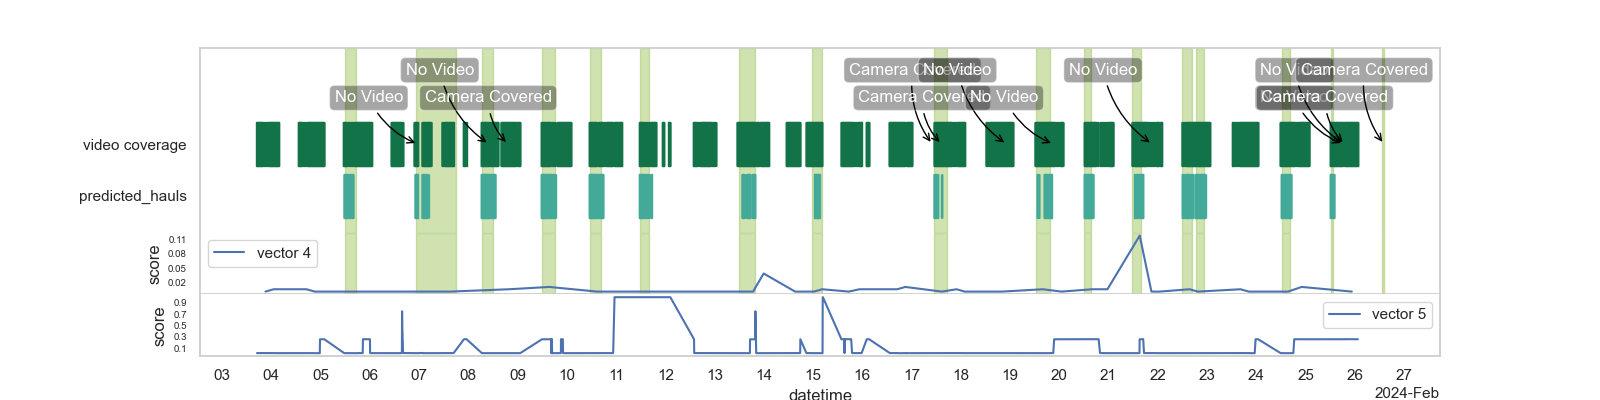

In [161]:
# df_test.reset_index(inplace = True)
bbox_args = dict(boxstyle="round", facecolor="black", alpha=0.35)
# bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.tight_layout()
fig, ax = plt.subplots(
    3,
    1,
    figsize=(16, 4),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1, 1]},
)

plot_set_vspan(brancol2_bv_sets, ax[0])
plot_set_vspan(brancol2_bv_sets, ax[1])
plot_event_bars(
    df_results.loc[df_results.predict_haul == 1],
    ax[0],
    "predicted_hauls",
    "utc_start_datetime",
    duration="5m",
    y_val=0.7,
)
plot_event_bars(
    video_Brancol2.loc[video_Brancol2["cam_name"] == "cam1"],
    ax[0],
    "video coverage",
    "utc_start_datetime",
    duration="5m",
    y_val=1.4,
    color="#117347",
)


sns.lineplot(x="datetime", y="score", data=dfVector4, ax=ax[1], label="vector 4")
sns.lineplot(x="datetime", y="score", data=dfVector5, ax=ax[2], label="vector 5")

ax[0].set_yticks([1, 1.7], ("predicted_hauls", "video coverage"))
ax[0].set_ylim([0.5, 3])
locator = DayLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax[1].tick_params(axis="y", labelsize=7)
ax[2].tick_params(axis="y", labelsize=7)
ax[2].xaxis.set_major_locator(locator)
ax[2].xaxis.set_major_formatter(formatter)

ax[0].spines["bottom"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[2].spines["top"].set_visible(False)
annots = annotate_notes(ax[0], video_eventsBrancol2, "category")

# setup(axs[5], title="AutoLocator()")
locator1 = ticker.MultipleLocator(0.03, offset=0.02)
locator2 = ticker.MultipleLocator(0.2, offset=0.1)

ax[1].yaxis.set_major_locator(locator1)
ax[2].yaxis.set_major_locator(locator2)

for an in annots:
    an.draggable()


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [116]:
label_coords = []
for ann in annots:
    box = matplotlib.text.Text.get_window_extent(ann)
    coords = ax[0].transAxes.inverted().transform(box)

    label_coords.append(coords)

In [ ]:
ai_countsBrancol2 = Brancol2data["ai_sets"]

In [127]:
df_results

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul
0,2024-02-03 16:45:00,0.000000,0.000000,0.0,0,10181,0.000000,0.0,no_haul,2024-02-03 17:15:00,no_haul,0
1,2024-02-03 16:50:00,0.000000,0.000000,0.0,0,10183,0.000000,0.0,no_haul,2024-02-03 17:20:00,no_haul,0
2,2024-02-03 16:55:00,0.000000,0.000000,0.0,0,10185,0.000000,0.0,no_haul,2024-02-03 17:25:00,no_haul,0
3,2024-02-03 17:05:00,0.000000,0.000000,0.0,0,10220,0.000000,0.0,no_haul,2024-02-03 17:35:00,no_haul,0
4,2024-02-03 17:10:00,0.000000,0.000000,0.0,0,10221,0.000000,0.0,no_haul,2024-02-03 17:40:00,no_haul,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2024-02-25 13:35:00,9.822155,0.577774,17.0,0,17427,197.387213,317.0,haul,2024-02-25 14:05:00,no_haul,1
2854,2024-02-25 13:40:00,10.779034,0.673690,16.0,0,17428,184.589156,296.0,haul,2024-02-25 14:10:00,no_haul,1
2855,2024-02-25 13:45:00,17.465409,0.623765,28.0,0,17429,174.011711,280.0,haul,2024-02-25 14:15:00,no_haul,1
2856,2024-02-25 13:50:00,14.140009,0.589167,24.0,0,17430,164.491988,265.0,haul,2024-02-25 14:20:00,no_haul,1


In [153]:
brancol2_elog.head()

,id,datetime,bycatchcount,catchcount,systemstartsetdatetime,systemendsetdatetime,systemstarthauldatetime,systemendhauldatetime
0,158,2024-02-24 16:33:50.455594,0,9,2024-02-23 19:51:49.145078,2024-02-23 23:15:22.021316,2024-02-24 12:18:34.470891,2024-02-24 16:29:48.880275
1,152,2024-02-15 04:37:45.472316,0,15,2024-02-14 11:30:10.090019,2024-02-14 17:20:10.299736,2024-02-14 23:35:47.936226,2024-02-15 04:36:24.888874
2,142,2024-02-06 22:29:05.878725,1,15,2024-02-04 20:56:50.699682,2024-02-05 00:55:06.480773,2024-02-05 11:39:50.504818,2024-02-05 17:15:40.279545
3,156,2024-02-21 16:01:15.796532,2,10,2024-02-20 21:35:46.998138,2024-02-21 01:51:35.891736,2024-02-21 11:32:12.739772,2024-02-21 15:52:09.768339
4,157,2024-02-22 16:36:47.015334,1,9,2024-02-21 22:33:11.341324,2024-02-22 01:23:06.433567,2024-02-22 11:48:22.424830,2024-02-22 16:34:26.363059


In [289]:
brancol2_bv_sets.head()

,set_id,trip_id,set_number,set_start_datetime,set_start_lat,set_start_lon,set_end_datetime,set_end_lat,set_end_lon,haul_start_datetime,haul_start_lat,haul_start_lon,haul_end_datetime,haul_end_lat,haul_end_lon,md_timestamp_added,md_file_name,md_ingest_uuid
0,brancol_2024-02-03_set_01,brancol_2024-02-03,1,2024-02-04 20:58:00,8.668,-86.19,2024-02-05 00:54:00,8.819,-86.446,2024-02-05 11:44:00,8.775,-86.335,2024-02-05 17:08:00,8.789,-86.021,2024-04-15 22:24:52,brancol_2024_02_03-0.csv,91250abd-b7d9-4650-af49-34f3a2ddb802
1,brancol_2024-02-03_set_02,brancol_2024-02-03,2,2024-02-06 11:08:00,8.751,-87.066,2024-02-06 15:08:00,8.557,-86.714,2024-02-06 22:41:00,8.556,-86.632,2024-02-07 18:00:00,8.687,-86.791,2024-04-15 22:24:52,brancol_2024_02_03-0.csv,91250abd-b7d9-4650-af49-34f3a2ddb802
2,brancol_2024-02-03_set_03,brancol_2024-02-03,3,2024-02-07 11:50:00,8.635,-87.003,2024-02-07 15:41:00,8.445,-86.673,2024-02-08 06:43:00,8.4,-86.574,2024-02-08 12:15:00,8.509,-86.816,2024-04-15 22:24:52,brancol_2024_02_03-0.csv,91250abd-b7d9-4650-af49-34f3a2ddb802
3,brancol_2024-02-03_set_04,brancol_2024-02-03,4,2024-02-08 19:20:00,8.179,-86.558,2024-02-08 22:51:00,8.01,-86.271,2024-02-09 12:04:00,8.202,-85.962,2024-02-09 18:20:00,8.453,-85.879,2024-04-15 22:24:52,brancol_2024_02_03-0.csv,91250abd-b7d9-4650-af49-34f3a2ddb802
4,brancol_2024-02-03_set_05,brancol_2024-02-03,5,2024-02-09 22:21:00,8.25,-85.917,2024-02-10 01:15:00,8.357,-86.057,2024-02-10 11:32:00,8.476,-85.758,2024-02-10 16:39:00,8.528,-85.589,2024-04-15 22:24:52,brancol_2024_02_03-0.csv,91250abd-b7d9-4650-af49-34f3a2ddb802


In [301]:
bvCounts_Brancol2 = Brancol2data["all_counts"]

In [302]:
bvCounts_Brancol2.head()

,id,count,detection_confidence,start_datetime,utc_start_datetime,utc_end_datetime,weighted_count,bv_count
1028,10181,0.0,0.0,2024-02-03 08:45:00-08:00,2024-02-03 16:45:00,2024-02-03 16:50:00,0.0,0.0
2932,10183,0.0,0.0,2024-02-03 08:50:00-08:00,2024-02-03 16:50:00,2024-02-03 16:55:00,0.0,0.0
2933,10185,0.0,0.0,2024-02-03 08:55:00-08:00,2024-02-03 16:55:00,2024-02-03 17:00:00,0.0,0.0
1717,10219,<NA>,<NA>,2024-02-03 09:00:00-08:00,2024-02-03 17:00:00,2024-02-03 17:05:00,<NA>,0.0
2423,10220,0.0,0.0,2024-02-03 09:05:00-08:00,2024-02-03 17:05:00,2024-02-03 17:10:00,0.0,0.0


In [305]:
df_results.loc[df_results["count"] > 0].head()

,utc_start_datetime,weighted_count,detection_confidence,count,is_haul,id,rolling_weighted_count,rolling_count,predictions,utc_end_datetime,haul,predict_haul
60,2024-02-03 22:25:00,1.098733,0.549367,2.0,0,10348,8.41094,15.0,no_haul,2024-02-03 22:55:00,no_haul,0
61,2024-02-03 22:30:00,0.605857,0.605857,1.0,0,10350,8.41094,15.0,no_haul,2024-02-03 23:00:00,no_haul,0
64,2024-02-03 22:45:00,1.103491,0.551745,2.0,0,10356,8.41094,15.0,no_haul,2024-02-03 23:15:00,no_haul,0
66,2024-02-03 22:55:00,1.732462,0.577487,3.0,0,10360,8.41094,15.0,no_haul,2024-02-03 23:25:00,no_haul,0
67,2024-02-03 23:00:00,1.794381,0.598127,3.0,0,10362,8.41094,15.0,no_haul,2024-02-03 23:30:00,no_haul,0


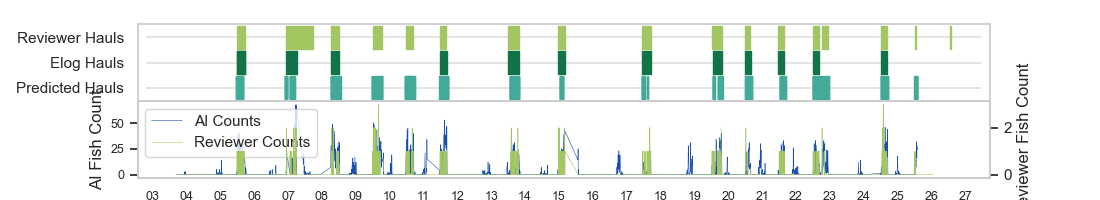

In [362]:
# df_test.reset_index(inplace = True)
bbox_args = dict(boxstyle="round", facecolor="black", alpha=0.35)
# plt.subplots_adjust(wspace=0, hspace=-.2)
# bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
# plt.tight_layout()
fig, ax = plt.subplots(
    2,
    1,
    figsize=(11, 2),
    sharex=True,
    # , gridspec_kw={'height_ratios': [2, 1]},
)
# plt.tight_layout()
# trip2 = Brancol2data['trip_info']
# plot_set_vspan(brancol2_bv_sets, ax[0])
# plot_set_vspan(brancol2_bv_sets, ax[1])
ax[0].hlines(
    [0.175, 0.5, 0.825], 0.01, 0.99, transform=ax[0].transAxes, colors="grey", lw=0.3, zorder=0
)


# matplotlib.pyplot.hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)

ax2 = ax[1].twinx()
ln1 = sns.lineplot(
    x="utc_start_datetime",
    y="count",
    data=df_results,
    ax=ax[1],
    label="AI Counts",
    color="#184EAD",
    clip_on=False,
    lw=0.4,
)
ln2 = sns.lineplot(
    x="start_datetime",
    y="bv_count",
    data=bvCounts_Brancol2,
    ax=ax2,
    label="Reviewer Counts",
    color="#a2c662",
    clip_on=False,
    lw=0.4,
)

ax[0].set_yticks([0.175, 0.5, 0.825], ("Predicted Hauls", "Elog Hauls", "Reviewer Hauls"))
ax[0].set_ylim([0, 1])
# ax[1].set_ylim([0, 50])
locator = DayLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax[1].tick_params(axis="both", labelsize=9)
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlabel("Datetime (UTC)")
ax[1].set_ylabel("AI Fish Count")
ax2.set_ylabel("Reviewer Fish Count")

# ax[0].spines['bottom'].set_visible(False)
# ax[1].spines['top'].set_visible(False)

plot_event_bars(
    brancol2_bv_sets,
    ax[0],
    "Reviewer Hauls",
    "haul_start_datetime",
    end_col="haul_end_datetime",
    y_val=0.675,
    y_height=0.3,
    color="#a2c662",
)
plot_event_bars(
    brancol2_elog,
    ax[0],
    "elog_hauls",
    "systemstarthauldatetime",
    end_col="systemendhauldatetime",
    y_val=0.35,
    color="#117347",
    y_height=0.3,
)
plot_event_bars(
    df_results.loc[df_results.predict_haul == 1],
    ax[0],
    "predicted_hauls",
    "utc_start_datetime",
    duration="5m",
    y_val=0.025,
    y_height=0.3,
)


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#a2c662", edgecolor="#a2c662", label="BV Hauls"),
    Patch(facecolor="#117347", edgecolor="#117347", label="Elog Hauls"),
    Patch(facecolor="#43aa99", edgecolor="#43aa99", label="Predicted Hauls"),
    Line2D([0], [0], color="#184EAD", lw=2, label="AI Counts"),
]

# ax[0].legend(handles=legend_elements, loc='upper left', fontsize = 9)


x0, x1 = ax[0].get_xlim()

h1, l1 = ax[1].get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax[1].legend(h1 + h2, l1 + l2, loc=2)

ax[0].set_xlim(x0, x1)
ax2.get_legend().remove()
# plt.legend(fontsize=20)

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("haul_detection.png")

plt.show()

In [353]:
ax[1].get_legend().get_handles()

AttributeError: 'Legend' object has no attribute 'get_handles'

In [320]:
x0, x1 = ax[1].get_xlim()

In [337]:
x1 + 300

20080.177083333332

In [335]:
x0

19755.579861111113

In [322]:
x_0, x_1 = ax[0].get_xlim()

In [323]:
x_0

19754.350000000002

In [268]:
df_notes = pd.read_csv("../data/reviewer_notes.csv")
df_notes["start_time"] = pd.to_datetime(df_notes["start_time"], format="mixed")

In [269]:
df_notes["end_time"] = pd.to_datetime(df_notes["end_time"], format="mixed")

In [ ]:
video_events = df_notes.loc[
    (df_notes["category"] == "No Video") | (df_notes["category"] == "Camera Covered")
]

video_events.dtypes

video_eventsBrancol2 = video_events.loc[
    (video_events["vessel"] == "Brancol") & (video_events["trip_number"] == 2)
]

In [273]:
df_notes["category"].value_counts()

category
Haul Stop          50
No Video           38
Gear Issue          9
Camera Covered      7
No Elog             5
Abnormal Catch      4
Elog Incorrect      4
Other Gear          4
Abnormal Haul       2
SSI Interaction     1
Transhipment        1
Other               1
Name: count, dtype: int64

In [278]:
eventsBrancol2 = df_notes.loc[(df_notes["vessel"] == "Brancol") & (df_notes["trip_number"] == 2)]

In [279]:
eventsBrancol2["category"].value_counts()

category
Haul Stop         37
No Video           7
Camera Covered     5
Other Gear         4
No Elog            3
Abnormal Catch     3
Abnormal Haul      1
Name: count, dtype: int64

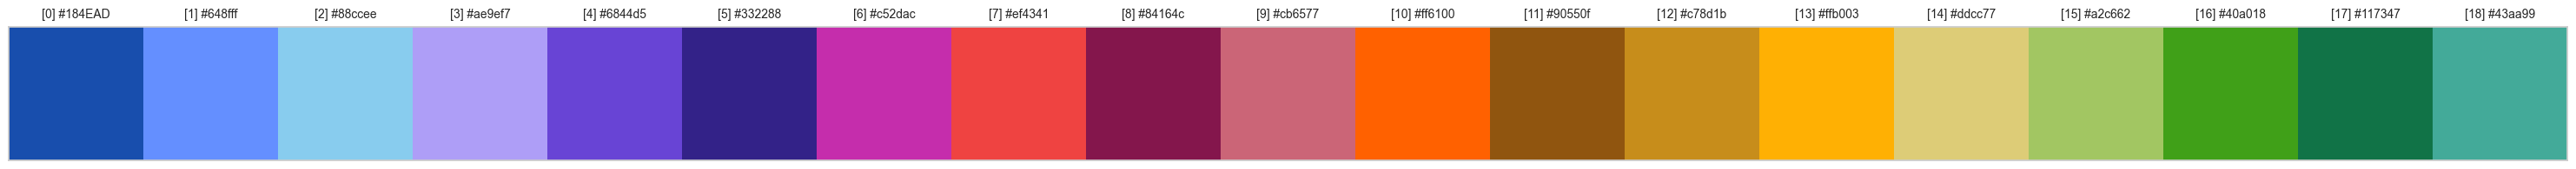

In [222]:
show_color_pallete()

In [223]:
category_dict = {
    "Haul Stop": colors[13],
    "Other Gear": colors[12],
    "Camera Covered": colors[10],
    "No Video": colors[6],
    "Abnormal Catch": colors[8],
}

In [ ]:
plot_event_vspan(df_events, ax, color_dict):

In [233]:
%matplotlib widget

In [259]:
def create_array(n, start_val, step_val):
    # Calculate the end value based on the number of steps, start value, and step value
    end_val = start_val + step_val * (n - 1)
    return np.linspace(start_val, end_val, n)

In [243]:
def plot_event_category_bars(df_events, ax, category_color_dict, y_val_start, y_height):
    n = len(category_color_dict)
    y_vals = create_array(n, y_val_start, y_height)
    for idx, (category, color) in enumerate(category_color_dict.items()):
        df_category = df_events.loc[df_events["category"] == category].copy()
        y_val = y_vals[idx]

        plot_event_bars(
            df_category,
            ax,
            category,
            "start_time",
            end_col="end_time",
            y_val=y_val,
            y_height=y_height,
            color=color,
        )

In [263]:
def plot_event_bars(
    df,
    ax,
    label,
    datetime_col,
    duration=None,
    end_col=None,
    duration_col=None,
    y_val=0.7,
    y_height=0.6,
    color="#43aa99",
):
    if duration:
        x_duration = np.full(len(df), pd.Timedelta(duration))
    elif end_col:
        df["duration"] = df[end_col] - df[datetime_col]
        x_duration = df["duration"]
    elif duration_col:
        x_duration = df[duration_col]
    else:
        x_duration = np.full(len(df), 2)

    x = list(zip(df[datetime_col], x_duration))
    y = (y_val, y_height)

    ax.broken_barh(x, y, facecolors=color, edgecolor="face", label=label, clip_on=False)


In [254]:
n = 10  # Length of the array
start_val = 1  # Starting value of the array
step_val = 2  # Step increase for each subsequent value

array = create_array(n, start_val, step_val)
len(array)

10

In [255]:
n = len(category_dict.keys())

In [256]:
n

5

In [ ]:
y_vals = [1.2,

In [248]:
list(category_dict.keys())

['Haul Stop', 'Other Gear', 'Camera Covered', 'No Video', 'Abnormal Catch']

In [249]:
y_labels = ["", "predicted_hauls"] + list(category_dict.keys())

In [250]:
y_labels

['',
 'predicted_hauls',
 'Haul Stop',
 'Other Gear',
 'Camera Covered',
 'No Video',
 'Abnormal Catch']

In [260]:
len(create_array(n, 1.2, 0.2))

5

In [272]:
eventsBrancol2["category"].value_counts()

category
No Video          7
Camera Covered    5
Name: count, dtype: int64

In [282]:
category_dict.pop("Other Gear")

(0.7803921568627451, 0.5529411764705883, 0.10588235294117647)

In [283]:
category_dict

{'Haul Stop': (1.0, 0.6901960784313725, 0.011764705882352941),
 'Camera Covered': (1.0, 0.3803921568627451, 0.0),
 'No Video': (0.7725490196078432, 0.17647058823529413, 0.6745098039215687),
 'Abnormal Catch': (0.5176470588235295,
  0.08627450980392157,
  0.2980392156862745)}

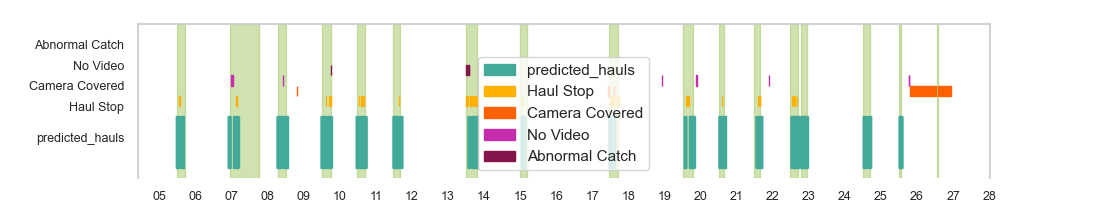

In [288]:
# df_test.reset_index(inplace = True)
bbox_args = dict(boxstyle="round", facecolor="black", alpha=0.35)
# plt.subplots_adjust(wspace=0, hspace=-.2)
# bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
# plt.tight_layout()
fig, ax = plt.subplots(
    1,
    1,
    figsize=(11, 2),
    sharex=True,
    # , gridspec_kw={'height_ratios': [2, 1]},
)

# trip2 = Brancol2data['trip_info']
plot_set_vspan(brancol2_bv_sets, ax)
# plot_set_vspan(brancol2_bv_sets, ax[1])
plot_event_bars(
    df_results.loc[df_results.predict_haul == 1],
    ax,
    "predicted_hauls",
    "utc_start_datetime",
    duration="5m",
    y_val=0.6,
    y_height=0.5,
)
plot_event_category_bars(eventsBrancol2, ax, category_dict, 1.2, 0.1)


# plot_event_bars(brancol2_elog, ax[0], 'elog_hauls','systemstarthauldatetime', end_col = 'systemendhauldatetime', y_val = 1.2, color = '#117347', y_height = .4)
# sns.lineplot(x = 'utc_start_datetime', y = 'count', data = df_results, ax = ax[1], label = 'AI Counts', color ='#184EAD', clip_on=False, lw = .4)

n = len(category_dict)
y_vals = [0, 0.9] + list(create_array(n, 1.2, 0.2))
y_labels = ["", "predicted_hauls"] + list(category_dict.keys())

ax.set_yticks(y_vals, y_labels)
ax.set_ylim([0.5, max(y_vals) + 0.2])
# ax[1].set_ylim([0, 50])
locator = DayLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.tick_params(axis="both", labelsize=9)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.spines["bottom"].set_visible(False)
# ax[1].spines['top'].set_visible(False)
ax.legend()

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor="#a2c662", edgecolor="#40a018", alpha=0.4, label="BV Hauls"),
    Patch(facecolor="#117347", edgecolor="#117347", label="Elog Hauls"),
    Patch(facecolor="#43aa99", edgecolor="#43aa99", label="Predicted Hauls"),
    Line2D([0], [0], color="#184EAD", lw=2, label="AI Counts"),
]

# ax[0].legend(handles=legend_elements, loc='upper left', fontsize = 9)
# ax[1].get_legend().remove()

# plt.legend(fontsize=20)

plt.subplots_adjust(wspace=0, hspace=-0.2)

plt.savefig("haul_detection.png")
plt.show()

In [ ]:
df = pd.read_csv('your.csv',

In [122]:
bad_lines = []

In [123]:
dfSystem_Brancol = pd.read_csv(
    "../data/sessions_brancol.csv", on_bad_lines=lambda x: bad_lines.append(str(x)), engine="python"
)

In [124]:
dfSystem_Brancol.head()

,912893,2023-06-01 08:32:57,brancol,cer1,up,64969,29613,pop-prd-pthalos000,
0,912903,2023-06-01 08:40:40,brancol,cer1,down,64969.0,29613.0,pop-prd-pthalos000,
1,0:07:43 7,None,None,None,None,NaN,NaN,None,None
2,remove me!,None,None,None,None,NaN,NaN,None,None
3,912908,2023-06-01 08:41:02,brancol,cer1,up,32258.0,57326.0,pop-prd-pthalos000,
4,0:00:22 0,None,None,None,None,NaN,NaN,None,None


In [173]:
# bad_lines[0]